In [39]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.cm as cm

import seaborn as sns
import os
import csv
import sys

import cv2

from glob import glob
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D
from scipy.stats import linregress
from scipy.spatial.distance import cdist
from scipy.linalg import polar

sys.path.insert(0, "..")

from utils import geometry
from utils import fileio

In [4]:
tm_spot_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Stretched\\Tracked\\20240503_1_IP_GFPCAAX-CheHis_uf_8p6_SP\\Frames\\traces/green_edges/tm_spots.csv', skiprows=[1,2,3])
tm_track_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Stretched\\Tracked\\20240503_1_IP_GFPCAAX-CheHis_uf_8p6_SP\\Frames\\traces/green_edges/tm_tracks.csv', skiprows=[1,2,3])
tm_edge_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Stretched\\Tracked\\20240503_1_IP_GFPCAAX-CheHis_uf_8p6_SP\\Frames\\traces/green_edges/tm_edges.csv', skiprows=[1,2,3])

In [5]:
dat_files=sorted(glob('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/Instant_data/20240503_1_IP_GFPCAAX-CheHis_uf_*/*/*/Data/*_cell_data_all*.csv'))
mat_dir=sorted(glob('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/Instant_data/20240503_1_IP_GFPCAAX-CheHis_uf_*/*/*/Matrices'))
save_folder='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/'
plot_dir = 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/Instant_plots\\20240503_1_IP_GFPCAAX-CheHis_uf_8p6/'

In [6]:
micron_size=553.57
pixel_size=1024

In [7]:
Au=np.loadtxt(glob(mat_dir[0]+'/*Matrix_A*.txt')[0])
Bu=np.loadtxt(glob(mat_dir[0]+'/*Matrix_B*.txt')[0])
Cu=np.loadtxt(glob(mat_dir[0]+'/*Matrix_C*.txt')[0])
Ru=np.loadtxt(glob(mat_dir[0]+'/*Matrix_R*.txt')[0])

As=np.loadtxt(glob(mat_dir[1]+'/*Matrix_A*.txt')[0])
Bs=np.loadtxt(glob(mat_dir[1]+'/*Matrix_B*.txt')[0])
Cs=np.loadtxt(glob(mat_dir[1]+'/*Matrix_C*.txt')[0])
Rs=np.loadtxt(glob(mat_dir[1]+'/*Matrix_R*.txt')[0])

cec_u=geometry.get_edge_count(Bu)
cell_centres_u=geometry.get_cell_centres(Cu,Ru,cec_u)
cec_s=geometry.get_edge_count(Bs)
cell_centres_s=geometry.get_cell_centres(Cs,Rs,cec_s)

cc_u=cell_centres_u-np.mean(cell_centres_u, axis=0)
cc_s=cell_centres_s-np.mean(cell_centres_s, axis=0)

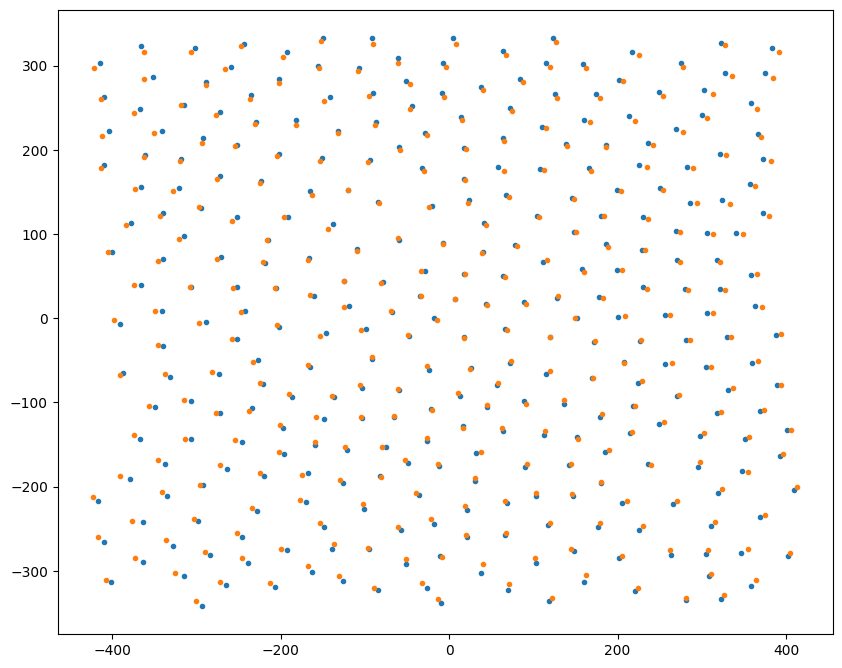

In [17]:
tm=tm_spot_dat[tm_spot_dat.FRAME==0][['ID','TRACK_ID', 'POSITION_X', 'POSITION_Y', 'FRAME']]
scale_factor=1.03
tm_cc=scale_factor*np.vstack((tm.POSITION_X-np.mean(tm.POSITION_X), -tm.POSITION_Y-np.mean(-tm.POSITION_Y))).T
F=np.array([[1.2, -0.05], [0, (1/1.1)]])
Fcc_u=(F@cc_u.T).T
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(10,10))
ax.scatter(Fcc_u[:,0], Fcc_u[:,1], marker='.')
ax.scatter(tm_cc[:,0], tm_cc[:,1], marker='.')

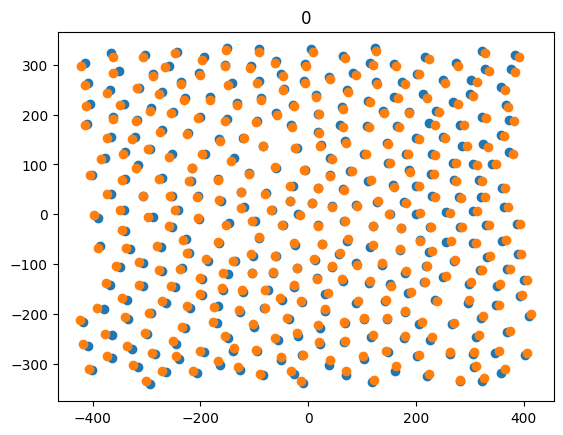

In [18]:
tm_spot_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Stretched\\Tracked\\20240503_1_IP_GFPCAAX-CheHis_uf_8p6_SP\\Frames\\traces/green_edges/tm_spots.csv', skiprows=[1,2,3])
tm_track_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Stretched\\Tracked\\20240503_1_IP_GFPCAAX-CheHis_uf_8p6_SP\\Frames\\traces/green_edges/tm_tracks.csv', skiprows=[1,2,3])
tm_edge_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Stretched\\Tracked\\20240503_1_IP_GFPCAAX-CheHis_uf_8p6_SP\\Frames\\traces/green_edges/tm_edges.csv', skiprows=[1,2,3])

cols=['cell_id', 'cell_perimeter_microns', 'cell_area_microns',
       'shape_parameter', 'circularity', 'cell_edge_count',
       'major_shape_axis_alignment_rads', 'cc_x', 'cc_y', 'track_id', 'spot_id', 'time', 'tm_frame']
dat_df=pd.DataFrame(columns=cols)

tm=tm_spot_dat[tm_spot_dat.FRAME==0][['ID','TRACK_ID', 'POSITION_X', 'POSITION_Y', 'FRAME']]


A=np.loadtxt(glob(mat_dir[0]+'/*Matrix_A*.txt')[0])
B=np.loadtxt(glob(mat_dir[0]+'/*Matrix_B*.txt')[0])
C=np.loadtxt(glob(mat_dir[0]+'/*Matrix_C*.txt')[0])
R=np.loadtxt(glob(mat_dir[0]+'/*Matrix_R*.txt')[0])

dat=pd.read_csv(dat_files[0])

cell_edge_count=geometry.get_edge_count(B)
cell_centres=geometry.get_cell_centres(C,R,cell_edge_count)

scale_factor=1.03

cc=np.vstack((cell_centres[:,0]-np.mean(cell_centres[:,0]),cell_centres[:,1]-np.mean(cell_centres[:,1]))).T
tm_cc=scale_factor*np.vstack((tm.POSITION_X-np.mean(tm.POSITION_X), -tm.POSITION_Y-np.mean(-tm.POSITION_Y))).T
F=np.array([[1.2, -0.05], [0, (1/1.1)]])
Fcc=(F@cc.T).T
plt.scatter(Fcc[:,0], Fcc[:,1])
plt.scatter(tm_cc[:,0], tm_cc[:,1])
plt.title(str(0))
plt.show()

dists=cdist(Fcc, tm_cc)
min_id=np.where(dists==np.min(dists, axis=0))[1]

dat['cc_x']=cc[:,0]
dat['cc_y']=cc[:,1]
dat['track_id']=np.array(tm.TRACK_ID.iloc[min_id])
dat['spot_id']=np.array(tm.ID.iloc[min_id])
dat['tm_frame']=np.array(tm.FRAME.iloc[min_id])
dat['time']=dat['tm_frame']*5



dat_df=pd.concat([dat_df,dat], ignore_index=True)


for i in range(1,len(dat_files)): #don't include 0p5 here
    tm=tm_spot_dat[tm_spot_dat.FRAME==i][['ID','TRACK_ID', 'POSITION_X', 'POSITION_Y', 'FRAME']]

    

    A=np.loadtxt(glob(mat_dir[i]+'/*Matrix_A*.txt')[0])
    B=np.loadtxt(glob(mat_dir[i]+'/*Matrix_B*.txt')[0])
    C=np.loadtxt(glob(mat_dir[i]+'/*Matrix_C*.txt')[0])
    R=np.loadtxt(glob(mat_dir[i]+'/*Matrix_R*.txt')[0])

    dat=pd.read_csv(dat_files[i])

    cell_edge_count=geometry.get_edge_count(B)
    cell_centres=geometry.get_cell_centres(C,R,cell_edge_count)

    scale_factor=1.03

    cc=np.vstack((cell_centres[:,0]-np.mean(cell_centres[:,0]),cell_centres[:,1]-np.mean(cell_centres[:,1]))).T
    tm_cc=scale_factor*np.vstack((tm.POSITION_X-np.mean(tm.POSITION_X), -tm.POSITION_Y-np.mean(-tm.POSITION_Y))).T

    # plt.scatter(cc[:,0], cc[:,1])
    # plt.scatter(tm_cc[:,0], tm_cc[:,1])
    # plt.title(str(i))
    # plt.show()

    dists=cdist(cc, tm_cc)
    min_id=np.where(dists==np.min(dists, axis=0))[1]

    dat['cc_x']=cc[:,0]
    dat['cc_y']=cc[:,1]
    dat['track_id']=np.array(tm.TRACK_ID.iloc[min_id])
    dat['spot_id']=np.array(tm.ID.iloc[min_id])
    dat['tm_frame']=np.array(tm.FRAME.iloc[min_id])
    dat['time']=dat['tm_frame']*5
    


    dat_df=pd.concat([dat_df,dat], ignore_index=True)



dat_df["parent_id"] = np.nan
dat_df["divisions"] = 0

t_id=np.max(dat_df.track_id)
Nc_orig=t_id
max_splits=np.max(tm_track_dat.NUMBER_SPLITS)


for s in tm_track_dat[tm_track_dat.NUMBER_SPLITS>0].TRACK_ID:

    
    splits=np.array(tm_track_dat[tm_track_dat.TRACK_ID==s].NUMBER_SPLITS)[0]

    split=np.where(np.unique(dat_df[dat_df.track_id==s].tm_frame,return_counts=True)[1]>1)[0][0]


    edges=tm_edge_dat[tm_edge_dat.TRACK_ID==s]
    n_edges=edges[edges.EDGE_TIME==split-0.5][['EDGE_TIME','SPOT_SOURCE_ID','SPOT_TARGET_ID']]
    track_a=[]
    track_b=[]
    track_a.append(n_edges.SPOT_TARGET_ID.iloc[0])
    track_b.append(n_edges.SPOT_TARGET_ID.iloc[1])
    
    for i in range(split+1,len(dat_files)):
        n_edges=edges[edges.EDGE_TIME==i-0.5][['EDGE_TIME','SPOT_SOURCE_ID','SPOT_TARGET_ID']]
        t_a=list(n_edges[n_edges.SPOT_SOURCE_ID.isin(track_a)].SPOT_TARGET_ID)
        t_b=list(n_edges[n_edges.SPOT_SOURCE_ID.isin(track_b)].SPOT_TARGET_ID)
        track_a=track_a+t_a
        track_b=track_b+t_b
    
    new_id_a=t_id+1
    new_id_b=t_id+2

    dat_df.loc[dat_df["spot_id"].isin(track_a), "track_id"]=new_id_a
    dat_df.loc[dat_df["spot_id"].isin(track_b), "track_id"]=new_id_b
    dat_df.loc[(dat_df["spot_id"].isin(track_a))|(dat_df["spot_id"].isin(track_b)), "parent_id"]=s
    dat_df.loc[(dat_df["spot_id"].isin(track_a))|(dat_df["spot_id"].isin(track_b)), "divisions"]+=1
    tm_edge_dat.loc[tm_edge_dat["SPOT_SOURCE_ID"].isin(track_a), "TRACK_ID"]=new_id_a
    tm_edge_dat.loc[tm_edge_dat["SPOT_SOURCE_ID"].isin(track_b), "TRACK_ID"]=new_id_b




    t_id=t_id+2

    if splits>1:
        if(len(np.where(np.unique(dat_df[dat_df.track_id==new_id_a].tm_frame,return_counts=True)[1]>1)[0])>0):
                split=np.unique(dat_df[dat_df.track_id==new_id_a].tm_frame,return_counts=True)[0][np.where(np.unique(dat_df[dat_df.track_id==new_id_a].tm_frame,return_counts=True)[1]>1)[0][0]]

                edges=tm_edge_dat[tm_edge_dat.TRACK_ID==new_id_a]
                n_edges=edges[edges.EDGE_TIME==split-0.5][['EDGE_TIME','SPOT_SOURCE_ID','SPOT_TARGET_ID']]
                track_a=[]
                track_b=[]
                track_a.append(n_edges.SPOT_TARGET_ID.iloc[0])
                track_b.append(n_edges.SPOT_TARGET_ID.iloc[1])

                for i in range(split+1,len(dat_files)):
                    n_edges=edges[edges.EDGE_TIME==i-0.5][['EDGE_TIME','SPOT_SOURCE_ID','SPOT_TARGET_ID']]
                    t_a=list(n_edges[n_edges.SPOT_SOURCE_ID.isin(track_a)].SPOT_TARGET_ID)
                    t_b=list(n_edges[n_edges.SPOT_SOURCE_ID.isin(track_b)].SPOT_TARGET_ID)
                    track_a=track_a+t_a
                    track_b=track_b+t_b

                new_id_aa=t_id+1
                new_id_bb=t_id+2

                dat_df.loc[dat_df["spot_id"].isin(track_a), "track_id"]=new_id_aa
                dat_df.loc[dat_df["spot_id"].isin(track_b), "track_id"]=new_id_bb
                dat_df.loc[(dat_df["spot_id"].isin(track_a))|(dat_df["spot_id"].isin(track_b)), "parent_id"]=new_id_a
                dat_df.loc[(dat_df["spot_id"].isin(track_a))|(dat_df["spot_id"].isin(track_b)), "divisions"]+=1
                tm_edge_dat.loc[tm_edge_dat["SPOT_SOURCE_ID"].isin(track_a), "TRACK_ID"]=new_id_aa
                tm_edge_dat.loc[tm_edge_dat["SPOT_SOURCE_ID"].isin(track_b), "TRACK_ID"]=new_id_bb

                t_id=t_id+2

        if(len(np.where(np.unique(dat_df[dat_df.track_id==new_id_b].tm_frame,return_counts=True)[1]>1)[0]) >0):
                split=np.unique(dat_df[dat_df.track_id==new_id_b].tm_frame,return_counts=True)[0][np.where(np.unique(dat_df[dat_df.track_id==new_id_b].tm_frame,return_counts=True)[1]>1)[0][0]]

                edges=tm_edge_dat[tm_edge_dat.TRACK_ID==new_id_b]
                n_edges=edges[edges.EDGE_TIME==split-0.5][['EDGE_TIME','SPOT_SOURCE_ID','SPOT_TARGET_ID']]
                track_a=[]
                track_b=[]
                track_a.append(n_edges.SPOT_TARGET_ID.iloc[0])
                track_b.append(n_edges.SPOT_TARGET_ID.iloc[1])

                for i in range(split+1,len(dat_files)):
                    n_edges=edges[edges.EDGE_TIME==i-0.5][['EDGE_TIME','SPOT_SOURCE_ID','SPOT_TARGET_ID']]
                    t_a=list(n_edges[n_edges.SPOT_SOURCE_ID.isin(track_a)].SPOT_TARGET_ID)
                    t_b=list(n_edges[n_edges.SPOT_SOURCE_ID.isin(track_b)].SPOT_TARGET_ID)
                    track_a=track_a+t_a
                    track_b=track_b+t_b

                new_id_aa=t_id+1
                new_id_bb=t_id+2

                dat_df.loc[dat_df["spot_id"].isin(track_a), "track_id"]=new_id_aa
                dat_df.loc[dat_df["spot_id"].isin(track_b), "track_id"]=new_id_bb
                dat_df.loc[(dat_df["spot_id"].isin(track_a))|(dat_df["spot_id"].isin(track_b)), "parent_id"]=new_id_b
                dat_df.loc[(dat_df["spot_id"].isin(track_a))|(dat_df["spot_id"].isin(track_b)), "divisions"]+=1
                tm_edge_dat.loc[tm_edge_dat["SPOT_SOURCE_ID"].isin(track_a), "TRACK_ID"]=new_id_aa
                tm_edge_dat.loc[tm_edge_dat["SPOT_SOURCE_ID"].isin(track_b), "TRACK_ID"]=new_id_bb

                t_id=t_id+2

dat_df=dat_df.rename(columns={"cell_id": "cell_id_old", "track_id": "cell_id_new"})
dat_df['angle_horizontal']=abs(np.where(dat_df.major_shape_axis_alignment_rads<np.pi/2,dat_df.major_shape_axis_alignment_rads, dat_df.major_shape_axis_alignment_rads-np.pi))
dat_df['cc_x']=dat_df['cc_x']*(micron_size/pixel_size)
dat_df['cc_y']=dat_df['cc_y']*(micron_size/pixel_size)



dat_df.to_csv(save_folder+"/20240503_1_IP_GFPCAAX-CheHis_uf_8p6_SP_pooled_mech.csv",index=False)

In [19]:
dat_df=dat_df.sort_values(['time', 'cell_id_new']).reset_index(drop=True)
dat_df['area_norm']=dat_df.cell_area_microns/(dat_df.groupby('cell_id_new').cell_area_microns.transform('first'))
dat_df['perimeter_norm']=dat_df.cell_perimeter_microns/(dat_df.groupby('cell_id_new').cell_perimeter_microns.transform('first'))
dat_df['circularity_norm']=dat_df.circularity/(dat_df.groupby('cell_id_new').circularity.transform('first'))

In [20]:
orig_cells=dat_df[dat_df.cell_id_new<=Nc_orig]

no_div=orig_cells[~orig_cells.cell_id_new.isin(np.where(tm_track_dat.NUMBER_SPLITS>0)[0])]
div_cells=orig_cells[orig_cells.cell_id_new.isin(np.where(tm_track_dat.NUMBER_SPLITS>0)[0])]
daughter_cells=dat_df[dat_df.cell_id_new>Nc_orig]

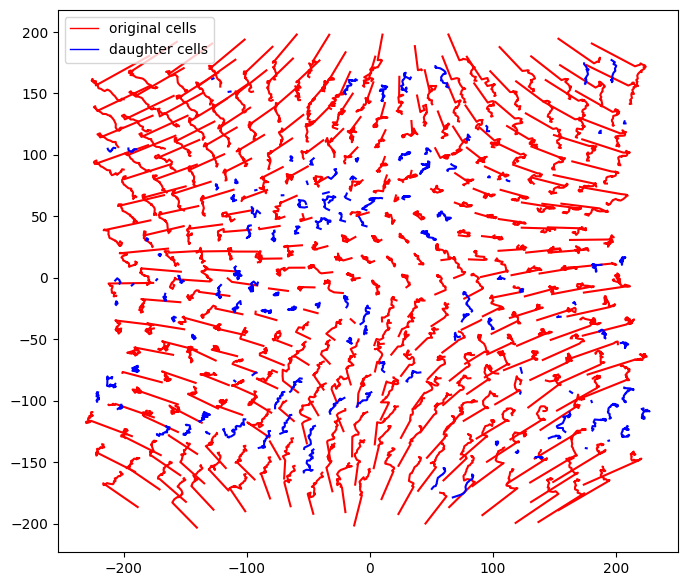

In [21]:
fig,ax=plt.subplots(figsize=(8, 8))
for i in (np.unique(dat_df.cell_id_new)):
    ax.plot(orig_cells[orig_cells.cell_id_new==i].cc_x, orig_cells[orig_cells.cell_id_new==i].cc_y, c='red', label='original cells')
    ax.plot(daughter_cells[daughter_cells.cell_id_new==i].cc_x, daughter_cells[daughter_cells.cell_id_new==i].cc_y, c='blue', label=daughter_cells)

ax.set_aspect('equal')
legend_elements = [Line2D([0], [0], color='r', lw=1, label='original cells'),
                  Line2D([0], [0], color='b', lw=1, label='daughter cells')]
ax.legend(handles=legend_elements)
plt.savefig(plot_dir+'/cell_tracks.png', dpi=300, bbox_inches='tight')

In [22]:
nd_t0=no_div[no_div.tm_frame==0][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
nd_t5=no_div[no_div.tm_frame==1][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
nd_t135=no_div[no_div.tm_frame==27][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
cc_us=pd.merge(nd_t0, nd_t5, on='cell_id_new', suffixes=("_u", "_s"))
cc_us['cc_dx']=cc_us.cc_x_s-cc_us.cc_x_u
cc_us['cc_dy']=cc_us.cc_y_s-cc_us.cc_y_u

cc_sr=pd.merge(nd_t5, nd_t135, on='cell_id_new', suffixes=("_s", "_r"))
cc_sr['cc_dx']=cc_sr.cc_x_r-cc_sr.cc_x_s
cc_sr['cc_dy']=cc_sr.cc_y_r-cc_sr.cc_y_s
cc_0=np.transpose(np.vstack((cc_us.cc_x_u, cc_us.cc_y_u)))
cc_5=np.transpose(np.vstack((cc_us.cc_x_s, cc_us.cc_y_s)))
aft=np.array(cv2.estimateAffine2D(cc_0, cc_5, method=cv2.RANSAC)[0][:,:2])
polar(aft)

(array([[ 0.99974442, -0.02260759],
        [ 0.02260759,  0.99974442]]),
 array([[ 1.21201418, -0.00599226],
        [-0.00599226,  0.89292674]]))

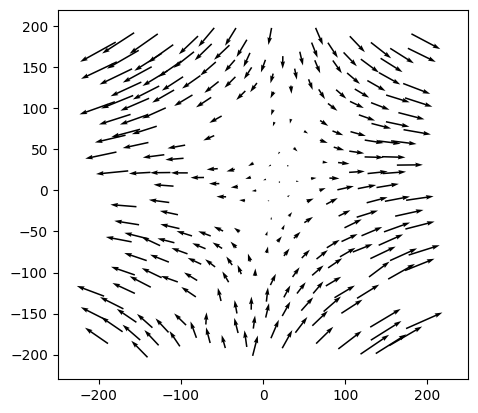

In [24]:
dx= cc_us.cc_dx
dy=cc_us.cc_dy


mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)

plt.quiver(cc_us.cc_x_u,cc_us.cc_y_u, dx, dy,units='xy', angles='xy', scale=1, zorder=10)

dx= cc_sr.cc_dx
dy=cc_sr.cc_dy


mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)

#plt.quiver(cc_sr.cc_x_s,cc_sr.cc_y_s, dx, dy,units='xy', angles='xy', scale=1, zorder=10, color='red')
plt.xlim(-250,250)
plt.ylim(-230,220)


plt.gca().set_aspect('equal')

plt.savefig(plot_dir+'/cell_centre_stretch.png', dpi=300, bbox_inches='tight')

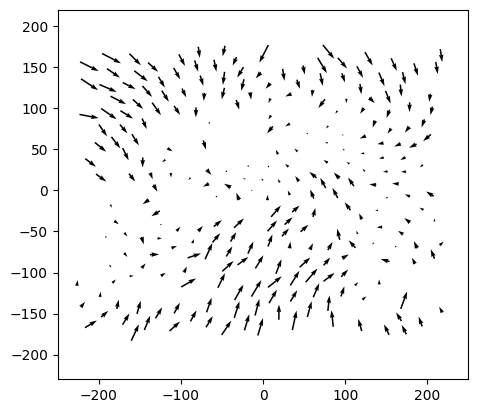

In [25]:
dx= cc_sr.cc_dx
dy=cc_sr.cc_dy


mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)

plt.quiver(cc_sr.cc_x_s,cc_sr.cc_y_s, dx, dy,units='xy', angles='xy', scale=1, zorder=10)
plt.xlim(-250,250)
plt.ylim(-230,220)


plt.gca().set_aspect('equal')
plt.savefig(plot_dir+'/cell_centre_relaxation.png', dpi=300, bbox_inches='tight')

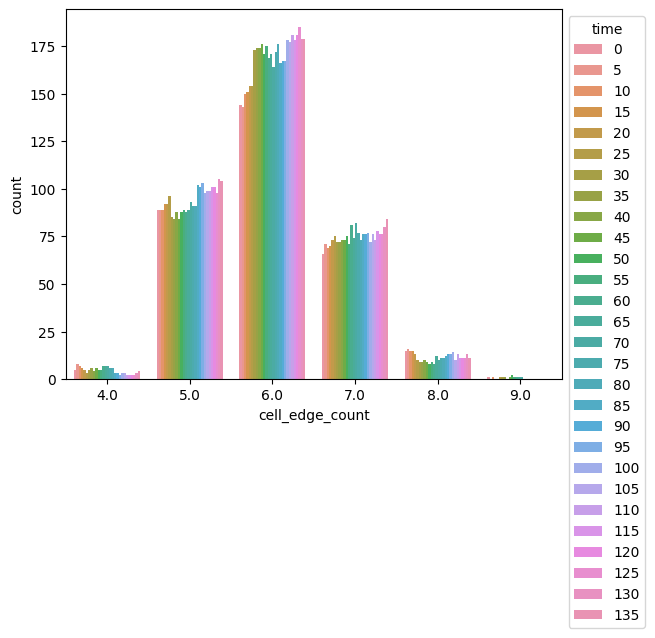

In [26]:
sns.countplot(data=dat_df,x='cell_edge_count', hue='time')
plt.legend( loc="upper left", bbox_to_anchor=(1, 1), title='time')
plt.savefig(plot_dir+'/cell_edges_hist.png', dpi=300, bbox_inches='tight')

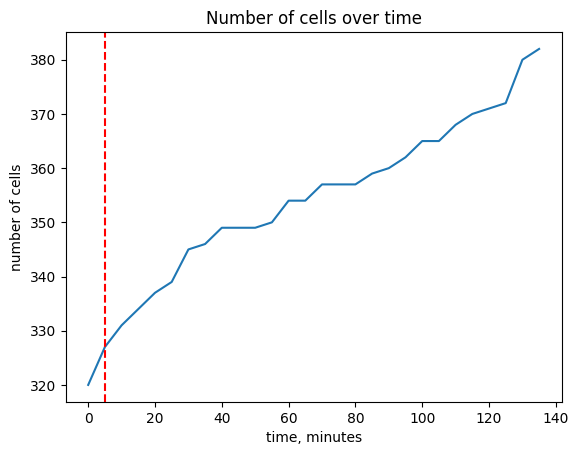

In [27]:
plt.plot(dat_df.groupby('time').count().cell_id_new)
plt.axvline(5, c='r', linestyle='--')
plt.xlabel('time, minutes')
plt.ylabel('number of cells')
plt.title("Number of cells over time")

plt.savefig(plot_dir+'/Number_cells_time.png', dpi=300, bbox_inches='tight')

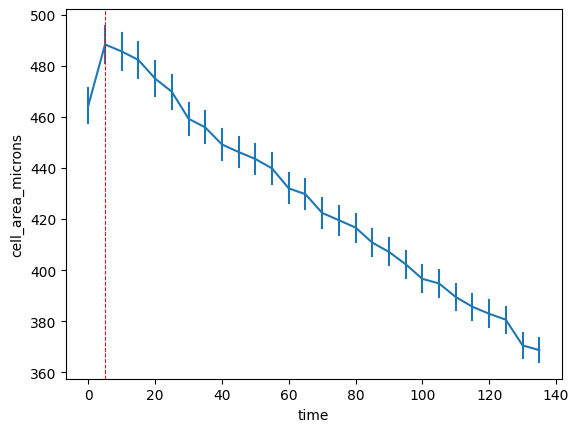

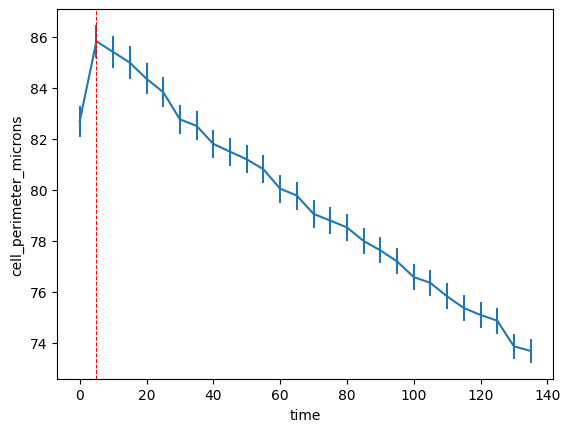

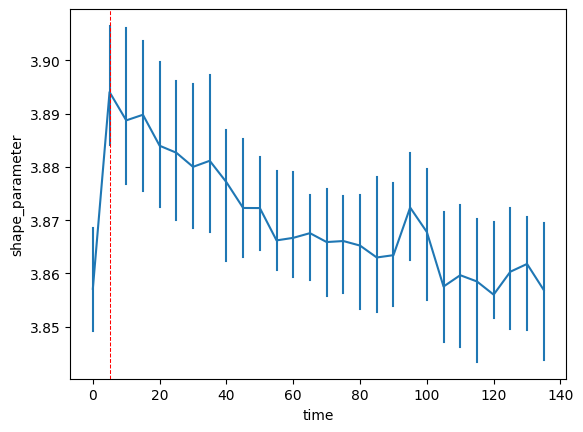

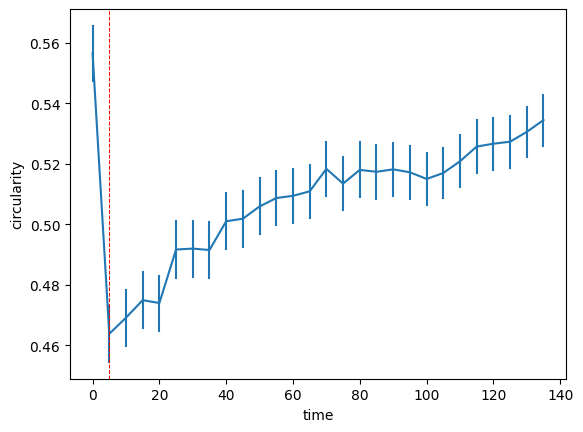

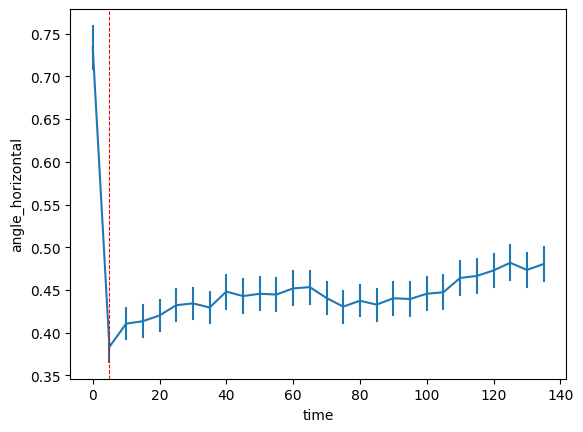

In [28]:
sns.lineplot(data=dat_df, y='cell_area_microns', x='time',err_style='bars', errorbar='se')
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/mean_cell_area_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='cell_perimeter_microns', x='time',err_style='bars', errorbar='se')
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/mean_cell_perimeter_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='shape_parameter', x='time',err_style='bars', estimator='median')
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/median_shape_parameter_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='circularity', x='time',err_style='bars', errorbar='se')
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/mean_circularity_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='angle_horizontal', x='time',err_style='bars', errorbar='se')
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/mean_angle_horizontal_time.png', dpi=300, bbox_inches='tight')
plt.show()

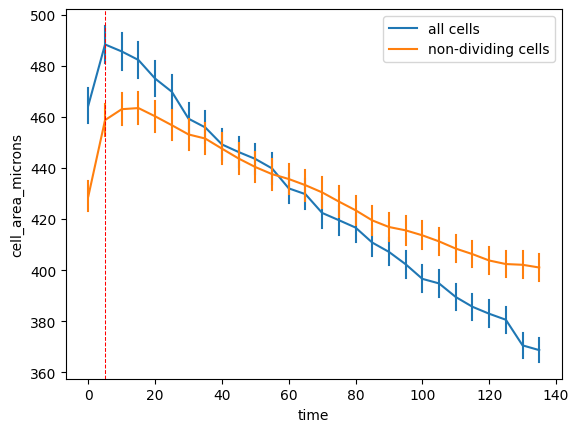

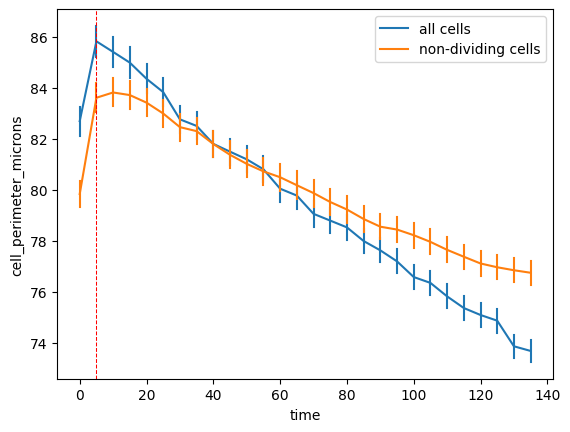

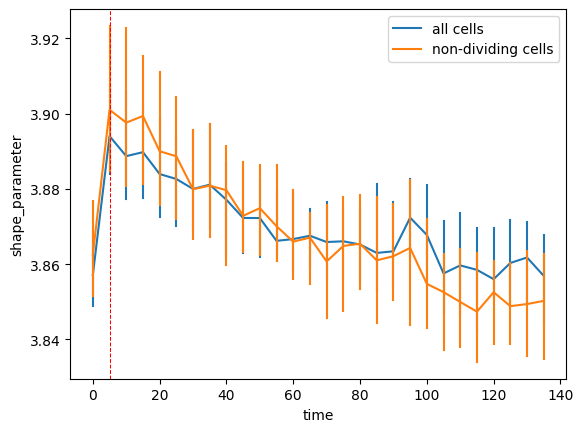

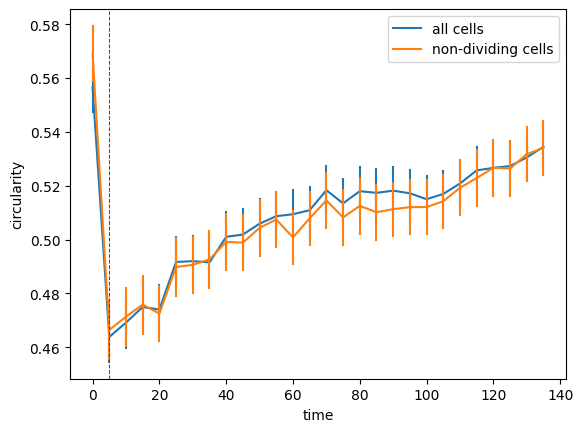

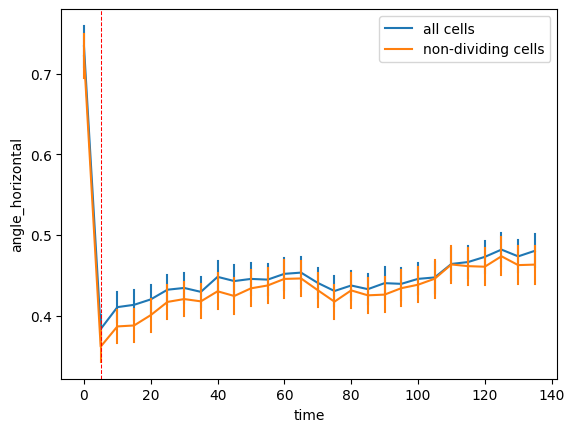

In [29]:
sns.lineplot(data=dat_df, y='cell_area_microns', x='time',err_style='bars', errorbar='se', label='all cells')
sns.lineplot(data=no_div, y='cell_area_microns', x='time',err_style='bars', errorbar='se', label='non-dividing cells')
plt.legend()
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/compare_mean_cell_area_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='cell_perimeter_microns', x='time',err_style='bars', errorbar='se', label='all cells')
sns.lineplot(data=no_div, y='cell_perimeter_microns', x='time',err_style='bars', errorbar='se', label='non-dividing cells')
plt.legend()
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/compare_mean_cell_perimeter_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='shape_parameter', x='time',err_style='bars', estimator='median', label='all cells')
sns.lineplot(data=no_div, y='shape_parameter', x='time',err_style='bars', estimator='median', label='non-dividing cells')
plt.legend()
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/compare_median_shape_parameter_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='circularity', x='time',err_style='bars', errorbar='se', label='all cells')
sns.lineplot(data=no_div, y='circularity', x='time',err_style='bars', errorbar='se', label='non-dividing cells')
plt.legend()
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/compare_mean_circularity_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='angle_horizontal', x='time',err_style='bars', errorbar='se', label='all cells')
sns.lineplot(data=no_div, y='angle_horizontal', x='time',err_style='bars', errorbar='se', label='non-dividing cells')
plt.legend()
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
plt.savefig(plot_dir+'/compare_mean_angle_horizontal_time.png', dpi=300, bbox_inches='tight')
plt.show()

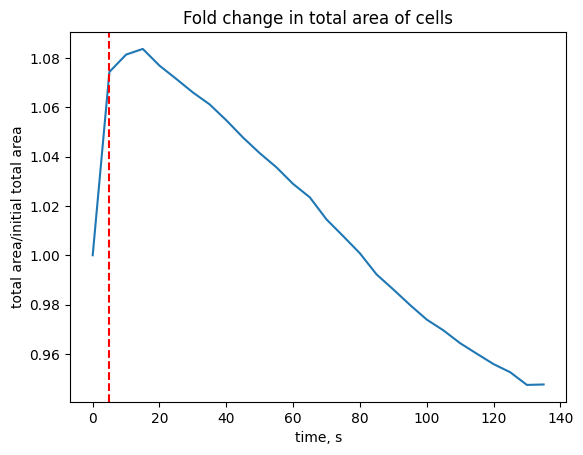

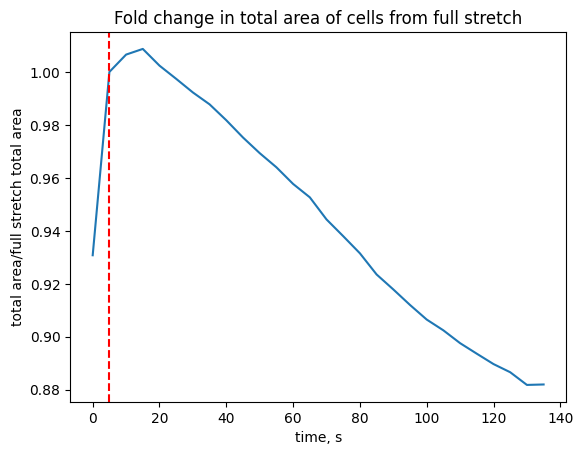

In [32]:
t=np.linspace(0, 135, 28)
plt.plot(t,dat_df.groupby('time').cell_area_microns.sum()/(dat_df[dat_df.time==0].sum().cell_area_microns))
plt.axvline(5, linestyle='--', color='red')
plt.xlabel("time, s")
plt.ylabel("total area/initial total area")
plt.title("Fold change in total area of cells")
plt.savefig(plot_dir+'/total_area.png', dpi=300, bbox_inches='tight')

plt.show()

t=np.linspace(0, 135, 28)
plt.plot(t,dat_df.groupby('time').cell_area_microns.sum()/(dat_df[dat_df.time==5].sum().cell_area_microns))
plt.axvline(5, linestyle='--', color='red')
plt.xlabel("time, s")
plt.ylabel("total area/full stretch total area")
plt.title("Fold change in total area of cells from full stretch")
plt.savefig(plot_dir+'/total_area_full_stretch.png', dpi=300, bbox_inches='tight')

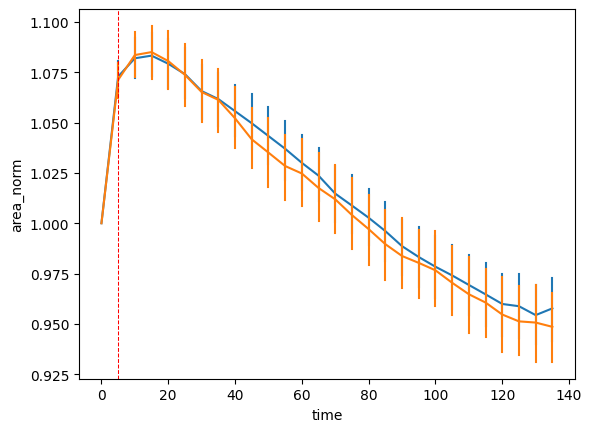

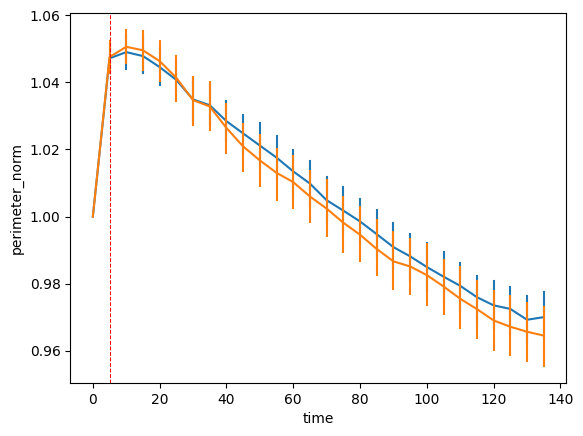

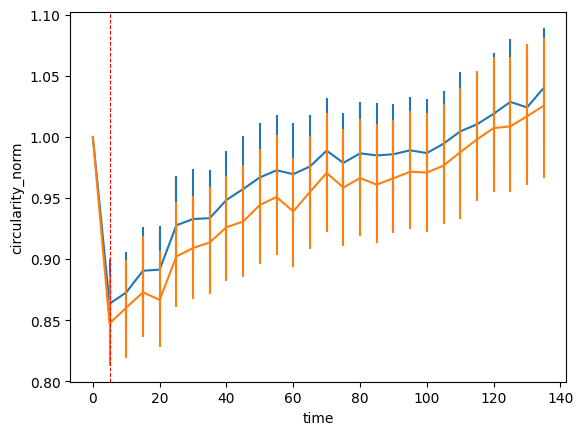

In [33]:
sns.lineplot(data=dat_df, y='area_norm', x='time',err_style='bars')
sns.lineplot(data=no_div, y='area_norm', x='time',err_style='bars')
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
#plt.savefig(plot_dir+'/mean_area_norm_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='perimeter_norm', x='time',err_style='bars')
sns.lineplot(data=no_div, y='perimeter_norm', x='time',err_style='bars')

plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
#plt.savefig(plot_dir+'/mean_perimeter_norm_time.png', dpi=300, bbox_inches='tight')
plt.show()
sns.lineplot(data=dat_df, y='circularity_norm', x='time',err_style='bars')
sns.lineplot(data=no_div, y='circularity_norm', x='time',err_style='bars')

plt.axvline(5, c='r', linestyle='--', linewidth=0.75)
#plt.savefig(plot_dir+'/mean_circ_norm_time.png', dpi=300, bbox_inches='tight')
plt.show()

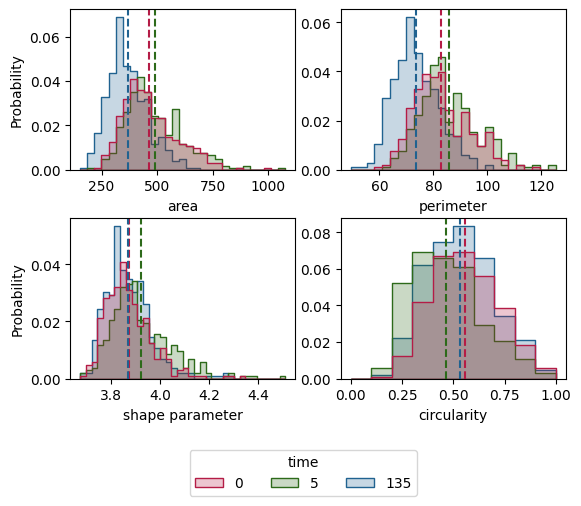

In [34]:
fig, ax=plt.subplots(2,2)
g=sns.histplot(data=dat_df[(dat_df.time ==0) | (dat_df.time==5)| (dat_df.time==135)], hue='time',x='cell_area_microns',stat='probability', element="step", palette=sns.husl_palette(3,l=.4), ax=ax[0,0], legend=False)
ax[0,0].axvline(np.mean(dat_df[dat_df.time ==0].cell_area_microns), c=sns.husl_palette(3,l=.4)[0], linestyle='--')
ax[0,0].axvline(np.mean(dat_df[dat_df.time ==5].cell_area_microns), c=sns.husl_palette(3,l=.4)[1], linestyle='--')
ax[0,0].axvline(np.mean(dat_df[dat_df.time ==135].cell_area_microns), c=sns.husl_palette(3,l=.4)[2], linestyle='--')

g=sns.histplot(data=dat_df[(dat_df.time ==0) | (dat_df.time==5)| (dat_df.time==135)], hue='time',x='cell_perimeter_microns',stat='probability', element="step", palette=sns.husl_palette(3,l=.4), ax=ax[0,1], legend=False)
ax[0,1].axvline(np.mean(dat_df[dat_df.time ==0].cell_perimeter_microns), c=sns.husl_palette(3,l=.4)[0], linestyle='--')
ax[0,1].axvline(np.mean(dat_df[dat_df.time ==5].cell_perimeter_microns), c=sns.husl_palette(3,l=.4)[1], linestyle='--')
ax[0,1].axvline(np.mean(dat_df[dat_df.time ==135].cell_perimeter_microns), c=sns.husl_palette(3,l=.4)[2], linestyle='--')

g=sns.histplot(data=dat_df[(dat_df.time ==0) | (dat_df.time==5)| (dat_df.time==135)], hue='time',x='circularity', element="step", stat='probability',palette=sns.husl_palette(3,l=.4), ax=ax[1,1], legend=False , binrange=[0,1], bins=10)
ax[1,1].axvline(np.mean(dat_df[dat_df.time ==0].circularity), c=sns.husl_palette(3,l=.4)[0], linestyle='--')
ax[1,1].axvline(np.mean(dat_df[dat_df.time ==5].circularity), c=sns.husl_palette(3,l=.4)[1], linestyle='--')
ax[1,1].axvline(np.mean(dat_df[dat_df.time ==135].circularity), c=sns.husl_palette(3,l=.4)[2], linestyle='--')

g=sns.histplot(data=dat_df[(dat_df.time ==0) | (dat_df.time==5)| (dat_df.time==135)], hue='time',x='shape_parameter', element="step",stat='probability', palette=sns.husl_palette(3,l=.4), ax=ax[1,0], legend=True)
ax[1,0].axvline(np.mean(dat_df[dat_df.time ==0].shape_parameter), c=sns.husl_palette(3,l=.4)[0], linestyle='--')
ax[1,0].axvline(np.mean(dat_df[dat_df.time ==5].shape_parameter), c=sns.husl_palette(3,l=.4)[1], linestyle='--')
ax[1,0].axvline(np.mean(dat_df[dat_df.time ==135].shape_parameter), c=sns.husl_palette(3,l=.4)[2], linestyle='--')

plt.subplots_adjust(hspace=0.3)
ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')

ax[0,1].set_xlabel('perimeter')
ax[1,1].set_xlabel('circularity')
ax[1,0].set_xlabel('shape parameter')
ax[0,0].set_xlabel('area')
sns.move_legend(g, "upper left", bbox_to_anchor=(0.5, -0.4), frameon=True, ncol=3)
plt.savefig(plot_dir+'/cell_quantities_hists.png', dpi=300, bbox_inches='tight')

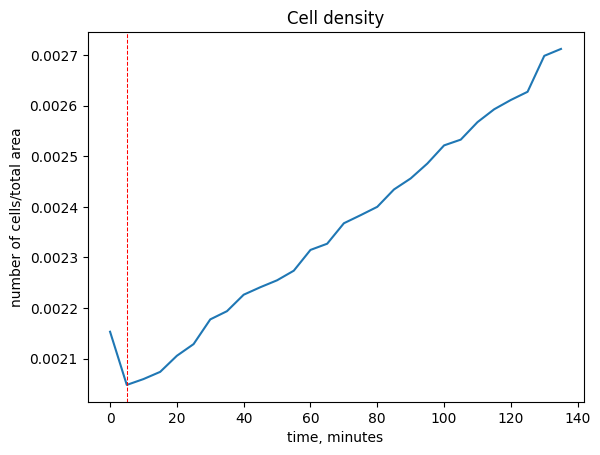

In [35]:
#cell density
plt.plot(dat_df.groupby('time').count().cell_id_new/(dat_df.groupby('time').cell_area_microns.sum()))
plt.axvline(5, c='r', linestyle='--', linewidth=0.75)

plt.xlabel('time, minutes')
plt.ylabel('number of cells/total area')
plt.title("Cell density")

plt.savefig(plot_dir+'/cell_density_time.png', dpi=300, bbox_inches='tight')

In [37]:
dat_str=dat_df[dat_df.time<=5]
no_div_str=dat_str[dat_str.cell_id_new.isin(np.unique(dat_str.cell_id_new)[np.where(dat_str.groupby('cell_id_new').count().time==5)])]
div_str=dat_str[dat_str.cell_id_new.isin(np.unique(dat_str.cell_id_new)[np.where(dat_str.groupby('cell_id_new').count().time<5)])]

dat_rlx=dat_df[dat_df.time>=5]
no_div_rlx=dat_rlx[dat_rlx.cell_id_new.isin(np.unique(dat_rlx.cell_id_new)[np.where(dat_rlx.groupby('cell_id_new').count().time==5)])]
div_rlx=dat_rlx[dat_rlx.cell_id_new.isin(np.unique(dat_rlx.cell_id_new)[np.where(dat_rlx.groupby('cell_id_new').count().time<5)])]

dat_rlx.groupby("cell_id_new").count()

,cell_id_old,cell_perimeter_microns,cell_area_microns,shape_parameter,circularity,cell_edge_count,major_shape_axis_alignment_rads,cc_x,cc_y,spot_id,...,cell_P_eff_nd,cell_shear,cell_zeta,major_stress_axis_alignment_rads,parent_id,divisions,angle_horizontal,area_norm,perimeter_norm,circularity_norm
cell_id_new,,,,,,,,,,,,,,,,,,,,,
0,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,0,27,27,27,27,27
1,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,0,27,27,27,27,27
2,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,0,27,27,27,27,27
3,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,0,27,27,27,27,27
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,0,27,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
440,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
441,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


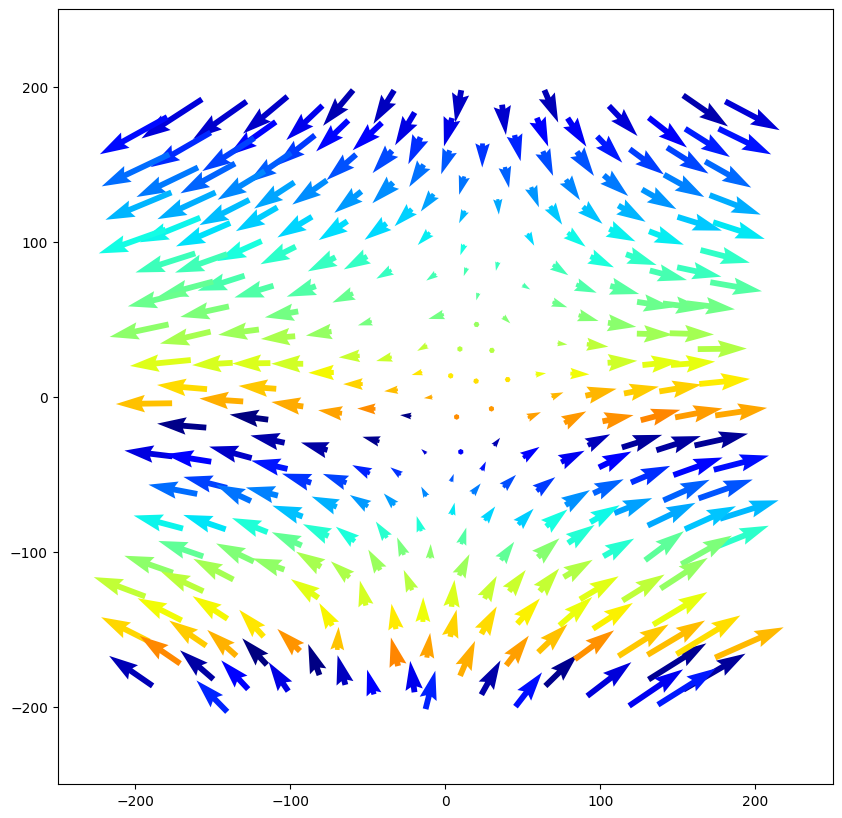

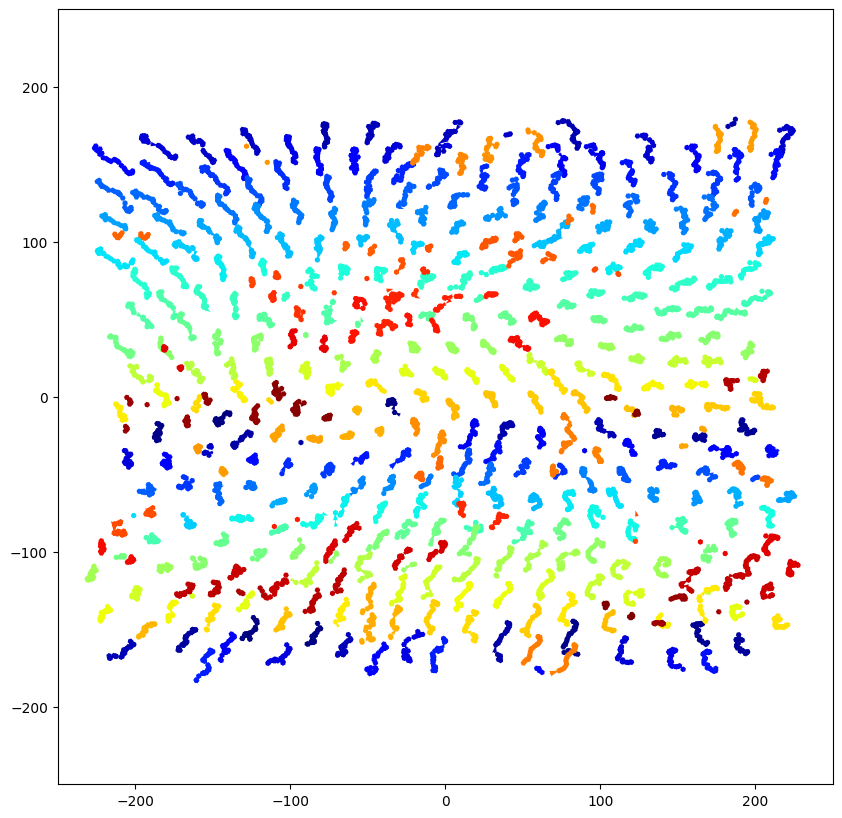

In [42]:
fig, ax = plt.subplots(figsize=(10, 15))

norm = mpl.colors.Normalize(vmin=0, vmax=np.max(np.unique(dat_str.cell_id_new)))
colours=[cm.jet(norm(x)) for x in range(np.max(np.unique(dat_str.cell_id_new))+1)]

for i in np.unique(dat_str.cell_id_new)[:]:
    dx= dat_str.groupby('cell_id_new').diff()[dat_str.cell_id_new==i].cc_x.iloc[1:]
    dy=dat_str.groupby('cell_id_new').diff()[dat_str.cell_id_new==i].cc_y.iloc[1:]
    X=dat_str.cc_x[dat_str.cell_id_new==i].iloc[:-1]
    Y=dat_str.cc_y[dat_str.cell_id_new==i].iloc[:-1]
    if len(dx)==len(X):

        mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)

        ax.quiver(X,Y, dx, dy,units='xy', angles='xy', scale=1, zorder=10, color=colours[i])


ax.set_xlim(-250,250)
ax.set_ylim(-250,250)


ax.set_aspect('equal')
#plt.savefig(plot_dir+'/cell_centre_stretch_traj.png', dpi=300, bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(10, 15))

norm = mpl.colors.Normalize(vmin=0, vmax=np.max(np.unique(dat_rlx.cell_id_new)))
colours=[cm.jet(norm(x)) for x in range(np.max(np.unique(dat_rlx.cell_id_new))+1)]

for i in np.unique(dat_rlx.cell_id_new)[:]:
    dx= dat_rlx.groupby('cell_id_new').diff()[dat_rlx.cell_id_new==i].cc_x.iloc[1:]
    dy=dat_rlx.groupby('cell_id_new').diff()[dat_rlx.cell_id_new==i].cc_y.iloc[1:]
    X=dat_rlx.cc_x[dat_rlx.cell_id_new==i].iloc[:-1]
    Y=dat_rlx.cc_y[dat_rlx.cell_id_new==i].iloc[:-1]
    if len(dx)==len(X):

        mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)

        ax.quiver(X,Y, dx, dy,units='xy', angles='xy', scale=1, zorder=10, color=colours[i])


ax.set_xlim(-250,250)
ax.set_ylim(-250,250)


ax.set_aspect('equal')
#plt.savefig(plot_dir+'/cell_centre_relax_traj.png', dpi=300, bbox_inches='tight')


In [45]:
daughter_cells

,cell_id_old,cell_perimeter_microns,cell_area_microns,shape_parameter,circularity,cell_edge_count,major_shape_axis_alignment_rads,cc_x,cc_y,cell_id_new,...,cell_P_eff_nd,cell_shear,cell_zeta,major_stress_axis_alignment_rads,parent_id,divisions,angle_horizontal,area_norm,perimeter_norm,circularity_norm
633,112.0,76.807036,403.442448,3.823932,0.470733,6.0,2.167178,-53.424792,-139.234249,322,...,-0.106545,0.097584,0.069924,0.596382,7.0,1,0.974415,1.000000,1.000000,1.000000
634,11.0,70.290700,325.413376,3.896549,0.728450,5.0,2.550553,-53.659050,-158.299258,323,...,-0.171516,0.093694,0.069852,0.979757,7.0,1,0.591039,1.000000,1.000000,1.000000
635,5.0,62.515964,192.004120,4.511653,0.152320,4.0,2.390861,43.972534,88.131293,362,...,-0.113654,0.363648,0.229221,0.820065,143.0,1,0.750732,1.000000,1.000000,1.000000
636,209.0,75.731145,375.825417,3.906443,0.584390,6.0,2.721049,28.745755,99.889250,363,...,-0.097800,0.099366,0.069011,1.150252,143.0,1,0.420544,1.000000,1.000000,1.000000
637,67.0,73.997733,332.281103,4.059435,0.504970,5.0,0.429303,-33.332651,61.182598,386,...,-0.076411,0.164626,0.107961,2.000100,190.0,1,0.429303,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,47.0,59.668202,236.425165,3.880575,0.551309,5.0,0.102791,-74.647506,-12.875097,439,...,-0.259744,0.073759,0.060764,1.673587,306.0,1,0.102791,0.854728,0.927082,0.895594
9905,196.0,70.943885,333.888444,3.882525,0.413586,6.0,3.064404,124.616070,-9.235086,440,...,-0.094690,0.168237,0.117317,1.493608,313.0,1,0.077188,1.026505,1.040558,0.655089
9906,53.0,65.608658,269.594826,3.995815,0.343055,5.0,3.030219,106.127697,1.180392,441,...,-0.138394,0.180280,0.127035,1.459423,313.0,1,0.111373,1.098214,1.053498,0.837937
9907,127.0,67.197123,301.303269,3.871228,0.405328,6.0,2.633227,102.631845,-134.923587,442,...,-0.149348,0.162464,0.119330,1.062430,314.0,1,0.508366,1.025361,1.002890,0.726444


C:\Users\v35431nc\AppData\Local\Temp\ipykernel_19068\851112589.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.plot(orig_cells[orig_cells.cell_id_new==i].cc_x[1:], orig_cells[orig_cells.cell_id_new==i].cc_y[1:], c='red', label='original cells')
C:\Users\v35431nc\AppData\Local\Temp\ipykernel_19068\851112589.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.plot(orig_cells[orig_cells.cell_id_new==i].cc_x[1:], orig_cells[orig_cells.cell_id_new==i].cc_y[1:], c='red', labe

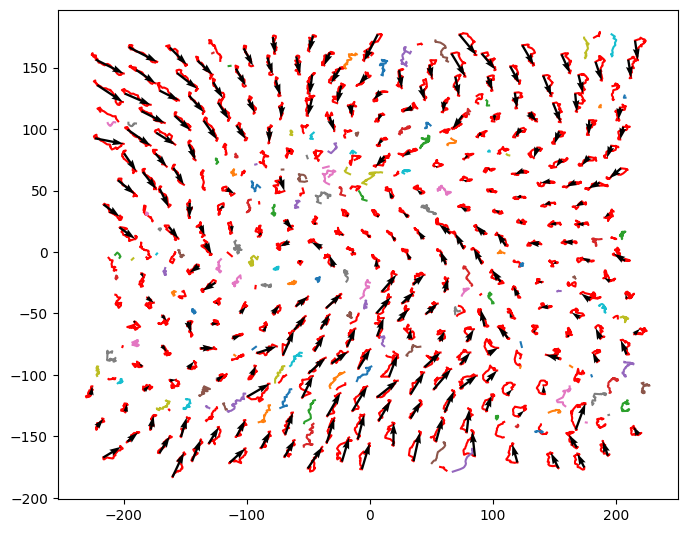

In [48]:
fig,ax=plt.subplots(figsize=(8, 8))
for i in (np.unique(dat_df.cell_id_new)):
    ax.plot(orig_cells[orig_cells.cell_id_new==i].cc_x[1:], orig_cells[orig_cells.cell_id_new==i].cc_y[1:], c='red', label='original cells')
    ax.plot(daughter_cells[daughter_cells.cell_id_new==i].cc_x, daughter_cells[daughter_cells.cell_id_new==i].cc_y, label=daughter_cells)

ax.set_aspect('equal')

dx= cc_sr.cc_dx
dy=cc_sr.cc_dy


ax.quiver(cc_sr.cc_x_s,cc_sr.cc_y_s, dx, dy,units='xy', angles='xy', scale=1, zorder=10)
# legend_elements = [Line2D([0], [0], color='r', lw=1, label='original cells'),
#                   Line2D([0], [0], color='b', lw=1, label='daughter cells')]
# ax.legend(handles=legend_elements)
#plt.savefig(plot_dir+'/cell_tracks.png', dpi=300, bbox_inches='tight')

In [60]:
nd_t0=no_div[no_div.tm_frame==0][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
nd_t5=no_div[no_div.tm_frame==1][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
nd_t135=no_div[no_div.tm_frame==27][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
cc_us=pd.merge(nd_t0, nd_t5, on='cell_id_new', suffixes=("_u", "_s"))
cc_us['cc_dx']=cc_us.cc_x_s-cc_us.cc_x_u
cc_us['cc_dy']=cc_us.cc_y_s-cc_us.cc_y_u

cc_sr=pd.merge(nd_t5, nd_t135, on='cell_id_new', suffixes=("_s", "_r"))
cc_sr['cc_dx']=cc_sr.cc_x_r-cc_sr.cc_x_s
cc_sr['cc_dy']=cc_sr.cc_y_r-cc_sr.cc_y_s
cc_0=np.transpose(np.vstack((cc_us.cc_x_u, cc_us.cc_y_u)))
cc_5=np.transpose(np.vstack((cc_us.cc_x_s, cc_us.cc_y_s)))
aft=np.array(cv2.estimateAffine2D(cc_0, cc_5, method=cv2.RANSAC)[0][:,:2])
aft

array([[ 1.21183987, -0.02617765],
       [ 0.02140999,  0.89256305]])

In [97]:
cc_0=dat_df[dat_df.tm_frame==0][['cc_x', 'cc_y']].values
cc_5=dat_df[dat_df.tm_frame==5][['cc_x', 'cc_y']].values

In [61]:
cv2.estimateAffinePartial2D(cc_0, cc_5, method=cv2.RANSAC)[0][:,:2]

array([[ 0.95392679, -0.14806077],
       [ 0.14806077,  0.95392679]])

In [80]:
match_edges=dat_df[dat_df.time==0][['cell_id_new', 'cell_id_old','cell_edge_count']].merge(dat_df[dat_df.time==5][['cell_id_new', 'cell_id_old','cell_edge_count']], on='cell_id_new')

matched=match_edges[match_edges.cell_edge_count_x==match_edges.cell_edge_count_y]

In [105]:
match_edges[match_edges.cell_edge_count_x!=match_edges.cell_edge_count_y]

,cell_id_new,cell_id_old_x,cell_edge_count_x,cell_id_old_y,cell_edge_count_y
3,3,7.0,5.0,104.0,6.0
9,10,156.0,6.0,45.0,5.0
21,22,44.0,5.0,3.0,4.0
23,24,101.0,6.0,8.0,5.0
25,26,319.0,9.0,317.0,8.0
34,35,259.0,7.0,158.0,6.0
35,36,90.0,5.0,235.0,6.0
38,39,99.0,6.0,9.0,5.0
48,49,38.0,5.0,162.0,6.0
49,50,297.0,7.0,233.0,6.0


In [99]:
Ru=Ru*(micron_size/pixel_size)
Rs=Rs*(micron_size/pixel_size)

In [108]:
np.where(Cu[matched.cell_id_old_x.values.astype(int)]==1)[1]

array([316, 327, 328, ..., 340, 344, 350], dtype=int64)

In [109]:
Ru[np.where(Cu[matched.cell_id_old_x.values.astype(int)]==1)[1]]
Rs[np.where(Cs[matched.cell_id_old_y.values.astype(int)]==1)[1]]

array([[117.30926758, 268.67606445],
       [102.71318359, 275.16321289],
       [131.90535156, 276.785     ],
       ...,
       [395.17545898, 285.97512695],
       [420.04286133, 287.59691406],
       [412.47452148, 293.00287109]])

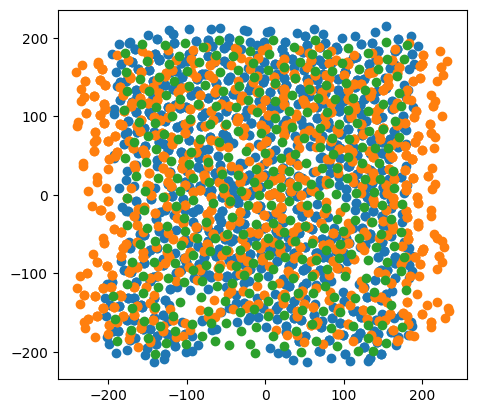

In [113]:
fig, ax=plt.subplots(subplot_kw={'aspect': 'equal'})
ax.scatter(Ru[np.where(Cu[matched.cell_id_old_x.values.astype(int)]==1)[1]][:,0]
-np.mean(Ru, axis=0)[0], Ru[np.where(Cu[matched.cell_id_old_x.values.astype(int)]==1)[1]]
[:,1]-np.mean(Ru, axis=0)[1])
ax.scatter(Rs[np.where(Cs[matched.cell_id_old_y.values.astype(int)]==1)[1]][:,0]-np.mean(Rs, axis=0)[0], Rs[np.where(Cs[matched.cell_id_old_y.values.astype(int)]==1)[1]][:,1]-np.mean(Rs, axis=0)[1])
ax.scatter(cc_0[:,0], cc_0[:,1])
plt.gca().set_aspect('equal')

In [114]:
Ru_matched=Ru[np.where(Cu[matched.cell_id_old_x.values.astype(int)]==1)[1]]-np.mean(Ru, axis=0)
Rs_matched=Rs[np.where(Cs[matched.cell_id_old_y.values.astype(int)]==1)[1]]-np.mean(Rs, axis=0)

In [115]:
cv2.estimateAffine2D(Ru_matched, Rs_matched)

(array([[ 1.20913759, -0.03553758, -1.2729649 ],
        [ 0.01246806,  0.89293277,  0.76681731]]),
 array([[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [0]], dtype=uint8))

In [116]:
aft

array([[ 1.21183987, -0.02617765],
       [ 0.02140999,  0.89256305]])

In [137]:
Fx=[1]
Fy=[1]

for i in range(dat_df.tm_frame.max()):

    cc_i=dat_df[dat_df.tm_frame==i][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
    cc_f=dat_df[dat_df.tm_frame==i+1][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
    cc_diff=pd.merge(cc_i, cc_f, on='cell_id_new', suffixes=("_i", "_f"), how='inner')
    cc_diff
    aft=np.array(cv2.estimateAffine2D(cc_diff[['cc_x_i', 'cc_y_i']].values, cc_diff[['cc_x_f', 'cc_y_f']].values, method=cv2.RANSAC)[0][:,:2])
    Fx.append(polar(aft)[1][0,0])
    Fy.append(polar(aft)[1][1,1])

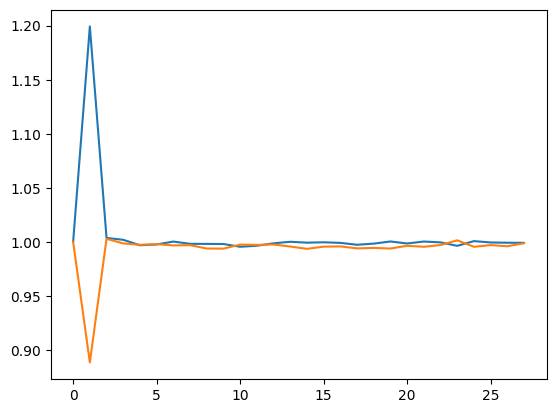

In [138]:
plt.plot(Fx)
plt.plot(Fy)

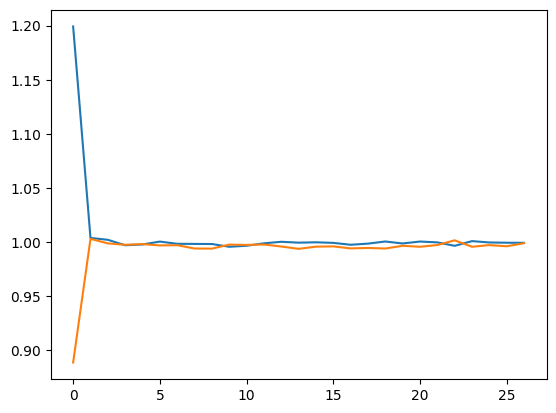

In [139]:
plt.plot(Fx[1:])
plt.plot(Fy[1:])

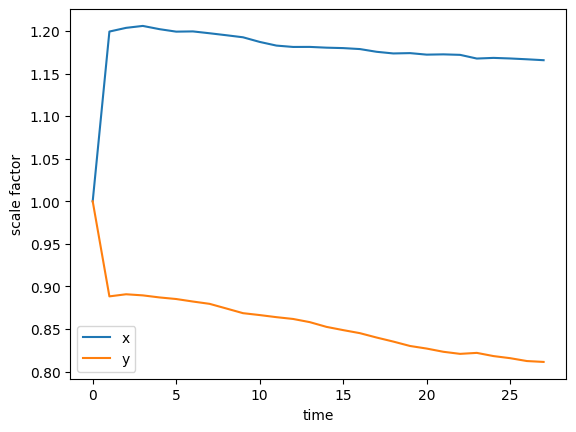

In [144]:
Fx=[1]
Fy=[1]

for i in range(dat_df.tm_frame.max()):

    cc_i=dat_df[dat_df.tm_frame==i][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
    cc_f=dat_df[dat_df.tm_frame==i+1][['cell_id_new','cc_x', 'cc_y', 'tm_frame']]
    cc_diff=pd.merge(cc_i, cc_f, on='cell_id_new', suffixes=("_i", "_f"), how='inner')
    cc_diff
    aft=np.array(cv2.estimateAffine2D(cc_diff[['cc_x_i', 'cc_y_i']].values, cc_diff[['cc_x_f', 'cc_y_f']].values, method=cv2.RANSAC)[0][:,:2])
    Fx.append(polar(aft)[1][0,0])
    Fy.append(polar(aft)[1][1,1])

plt.plot(np.cumprod(Fx), label='x')
plt.plot(np.cumprod(Fy), label='y')
plt.xlabel('time')
plt.ylabel('scale factor')
plt.legend()
plt.savefig(plot_dir+'/scale_factor_time.png', dpi=300, bbox_inches='tight')